<a href="https://colab.research.google.com/github/rushikantode/KidneyDiseasePrediction/blob/main/Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,1,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,NaN
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
#convering alpha value to numeric
df.replace(('normal', 'abnormal'), (1, 0), inplace=True)
df.replace(('present', 'notpresent'), (1, 0), inplace=True)
df.replace(('good', 'poor'), (1, 0), inplace=True)
df.replace(('yes', 'no'), (1, 0), inplace=True)
df.replace(('ckd','notckd'), (1,0), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             249 non-null    object 
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             314 non-null    float64
 14  pot             313 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['dm'] = pd.to_numeric(df['dm'], errors='coerce')
df['cad'] = pd.to_numeric(df['cad'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
df["rbc"] = pd.to_numeric(df["rbc"])
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')
#df['classification'] = df['classification'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             249 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             314 non-null    float64
 14  pot             313 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               151
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                86
pot                87
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification    119
dtype: int64

In [ ]:
df = df.interpolate(method = 'spline', order = 3)
display(df.isna().sum())

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<ipython-input-10-018dca5930fe>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


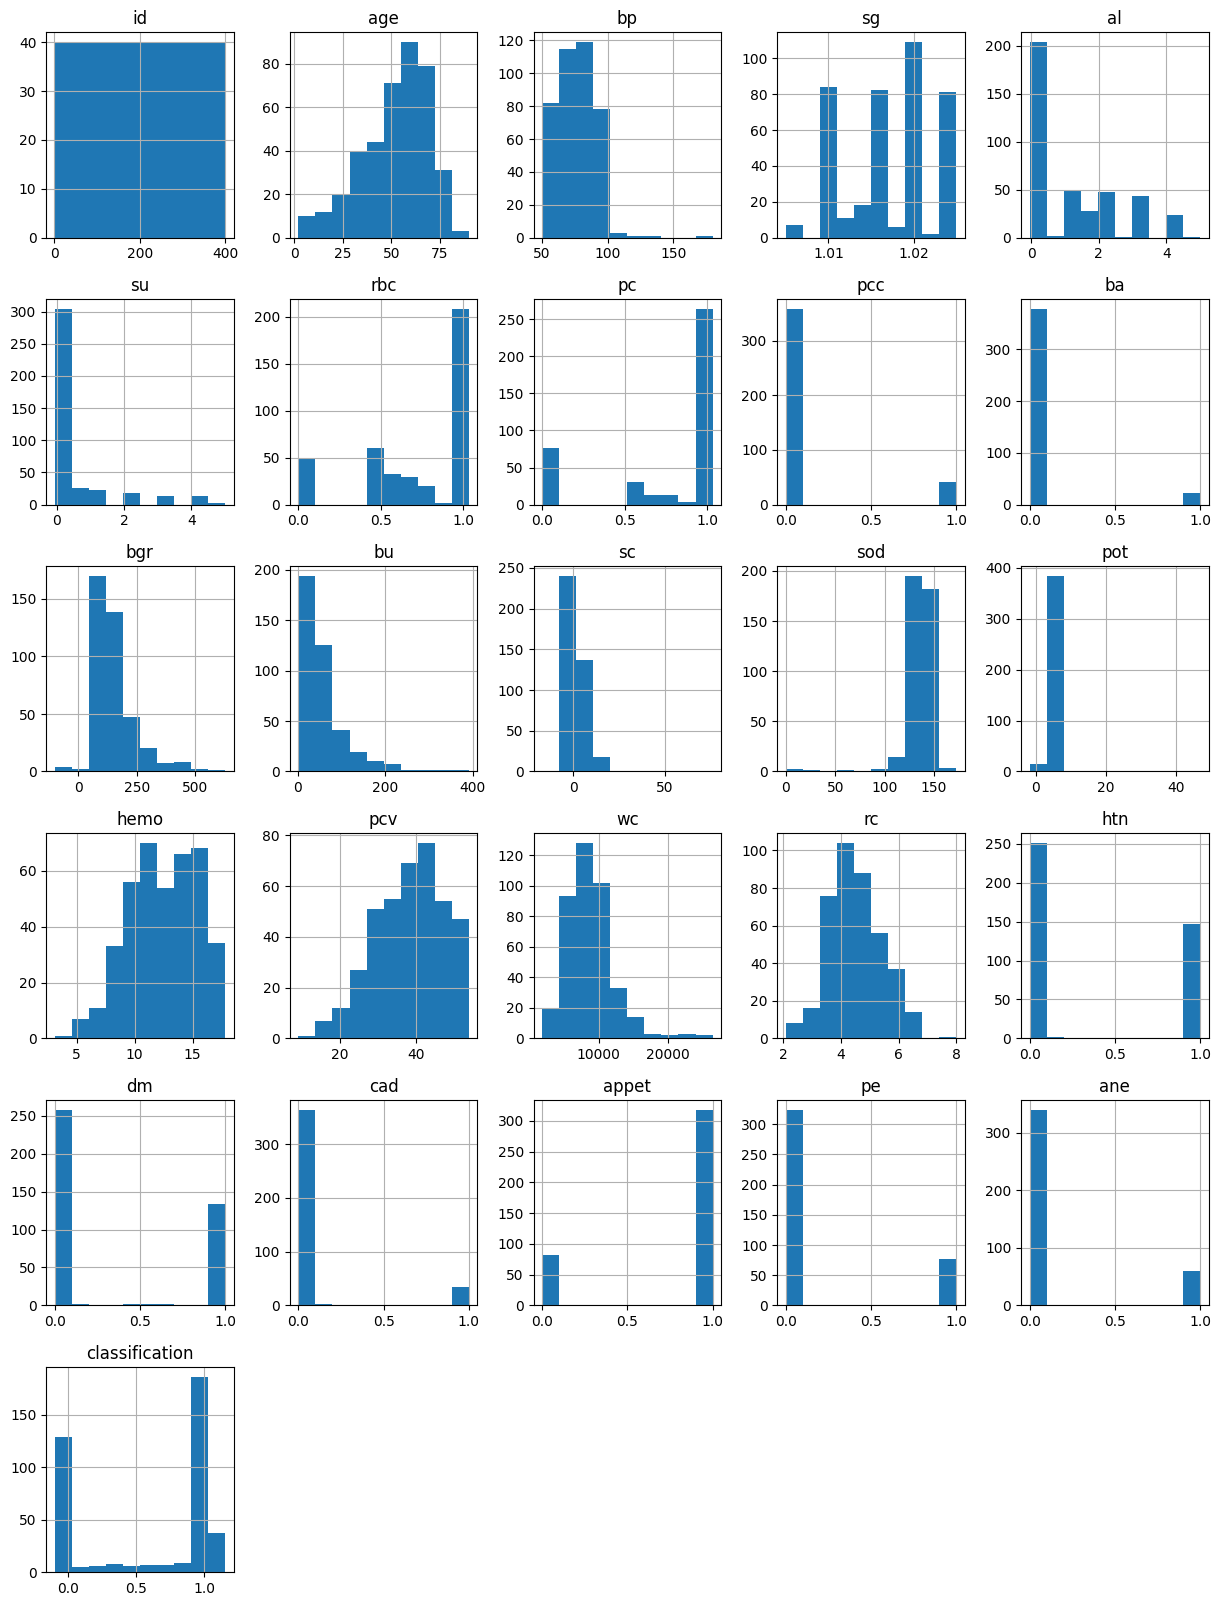

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [ ]:
df = df.set_index("id")

In [ ]:
df.shape

(400, 25)

In [ ]:
df['classification'] = df['classification'].astype(np.int64)

In [ ]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [ ]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#define the features
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	7
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=56, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FF262F56A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FF262F56A40, verbose=2)

In [ ]:
# select the top 10 features
top_features = df.columns[df.columns!="classification"][feat_selector.ranking_ <= 10].tolist()
top_features

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

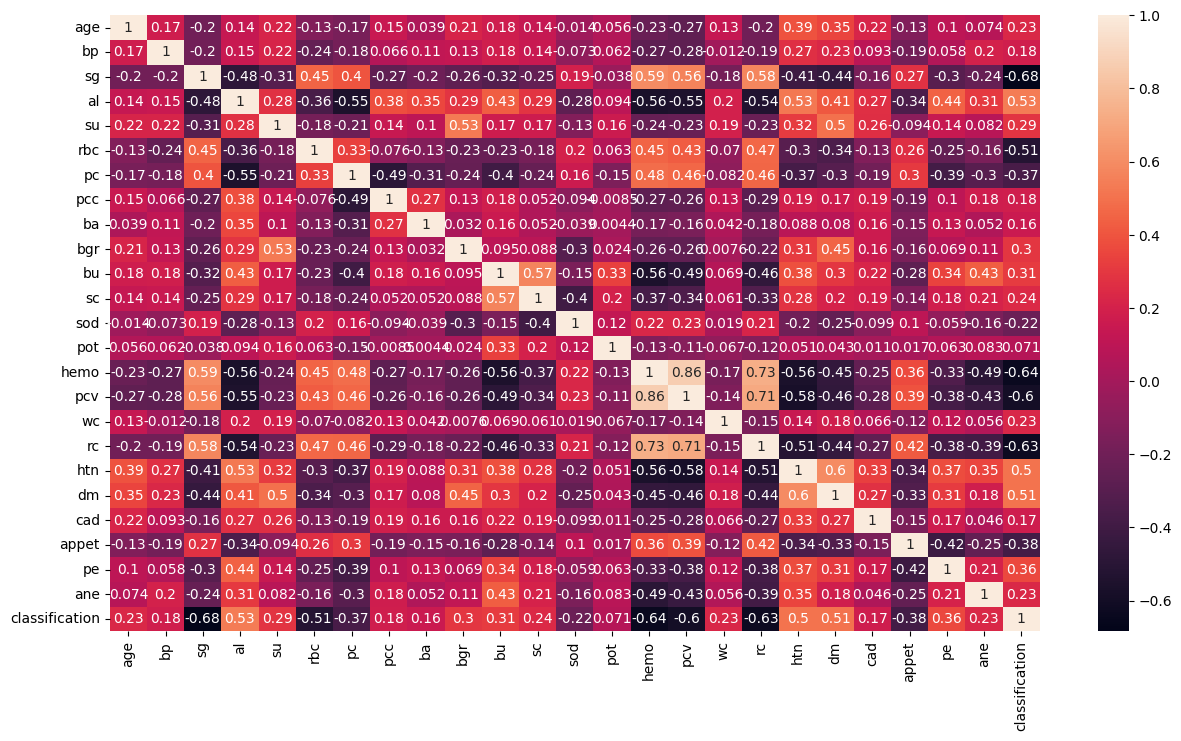

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
corrmap = df.corr()

In [ ]:
df.corrwith(df["classification"])


age               0.234218
bp                0.180663
sg               -0.683814
al                0.533376
su                0.287544
rbc              -0.513415
pc               -0.366382
pcc               0.184073
ba                0.155744
bgr               0.295108
bu                0.312856
sc                0.243456
sod              -0.218876
pot               0.071336
hemo             -0.643230
pcv              -0.596547
wc                0.226373
rc               -0.630678
htn               0.504599
dm                0.505305
cad               0.174950
appet            -0.381398
pe                0.357093
ane               0.232683
classification    1.000000
dtype: float64

In [ ]:
def get_corelated_col(cor_dat, threshold):
  feature=[]
  value=[]

  for i, index in enumerate(cor_dat.index):
    if abs(cor_dat[index])>threshold:
      feature.append(index)
      value.append(cor_dat[index])


  df = pd.DataFrame(data=value, index=feature, columns=['corr_value'])
  return df

In [ ]:
top_corelated_values = get_corelated_col(corrmap['classification'],0.5)
top_corelated_values

,corr_value
sg,-0.683814
al,0.533376
rbc,-0.513415
hemo,-0.643230
pcv,-0.596547
rc,-0.630678
htn,0.504599
dm,0.505305
classification,1.000000


In [ ]:
df = df[top_corelated_values.index]
df.head()

,sg,al,rbc,hemo,pcv,rc,htn,dm,classification
id,,,,,,,,,
1,1.020,1.0,0.000000,15.4,44.0,5.200000,1.0,1.0,0
2,1.020,4.0,0.739258,11.3,38.0,4.264285,0.0,0.0,1
3,1.010,2.0,1.000000,9.6,31.0,4.251970,0.0,1.0,1
4,1.005,4.0,1.000000,11.2,32.0,3.900000,1.0,0.0,0
5,1.010,2.0,1.000000,11.6,35.0,4.600000,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,df.columns!="classification"].values
y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 4), random_state=1)

In [ ]:
clf.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 4), random_state=1,
              solver='lbfgs')

In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
Acc = metrics.accuracy_score(y_test, pred)

ANN

In [ ]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,df.columns!="classification"].values
Y = df['classification']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_col = df.iloc[:,df.columns!="classification"].values
y_col = df['classification']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_col, y_col, test_size=0.3)

In [ ]:
...
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

...
# fit the keras model on the dataset
model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
40/40 [==============================] - 1s 1ms/step - loss: 0.8089 - accuracy: 0.6000
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.6179 - accuracy: 0.6650
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7325
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.7600
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.8025
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.8075
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8225
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.8125
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.8250
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8275
Epoch 11/

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy))

13/13 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.9050
Accuracy: 0.90


StraitifiedKFold

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# evaluate baseline model with standardized dataset
estimators = []
#estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Accuracy: %2f" % (results.mean()))

Accuracy: 0.921429


In [ ]:
# accuracy of all the algorithm
comparison = pd.DataFrame({
    "Multi Layer Perceptron":{'Accuracy': Acc*100},
    "Artificial Neural Network":{'Accuracy': accuracy*100},
    "StraigtifiedKFold":{'Accuracy': results.mean()*100}
}).T

In [ ]:
comparison


,Accuracy
Multi Layer Perceptron,88.750000
Artificial Neural Network,90.499997
StraigtifiedKFold,92.142857


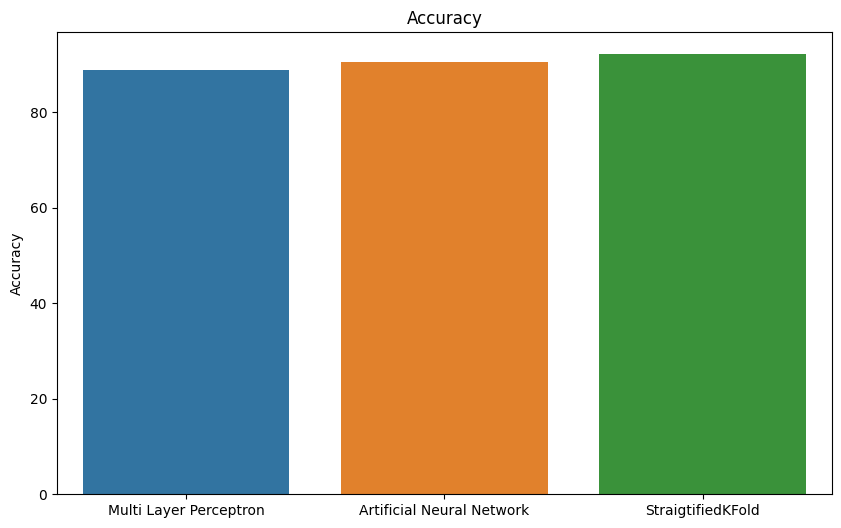

In [ ]:
#visulizing Accuuracy with graph
fig = plt.gcf()
fig.set_size_inches(10, 6)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(1,1,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

TESTING

In [ ]:
df =pd.read_csv('/content/test.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,252,23,80,1.025,0,0,1,1,0,0,...,52,9800,5,0,0,0,1,0,0,0


In [ ]:
df=df[top_corelated_values.index]
df

,sg,al,rbc,hemo,pcv,rc,htn,dm,classification
0,1.025,0,1,17,52,5,0,0,0


In [ ]:
df.drop(['classification'],axis=1,inplace = True)

<ipython-input-48-0852104491d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['classification'],axis=1,inplace = True)


In [ ]:
prediction = model.predict(df)

1/1 [==============================] - 0s 54ms/step


In [ ]:
print('you are at risk') if prediction[0] ==0 else print('You are not at risk')

You are not at risk
